<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Implementation" data-toc-modified-id="Implementation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#Experiment" data-toc-modified-id="Experiment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experiment</a></span><ul class="toc-item"><li><span><a href="#Binary-classification" data-toc-modified-id="Binary-classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Binary classification</a></span><ul class="toc-item"><li><span><a href="#Data-generation" data-toc-modified-id="Data-generation-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data generation</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Regression</a></span></li></ul></li><li><span><a href="#Multi-class-classification" data-toc-modified-id="Multi-class-classification-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multi-class classification</a></span><ul class="toc-item"><li><span><a href="#Three-classes" data-toc-modified-id="Three-classes-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Three classes</a></span></li><li><span><a href="#Switch-problem" data-toc-modified-id="Switch-problem-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Switch problem</a></span></li><li><span><a href="#Four-classes-problem" data-toc-modified-id="Four-classes-problem-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Four classes problem</a></span></li><li><span><a href="#Xor-problem" data-toc-modified-id="Xor-problem-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Xor problem</a></span></li></ul></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Discussion</a></span><ul class="toc-item"><li><span><a href="#sigmoid-and-softmax-comparison-in-2-classes-probelm" data-toc-modified-id="sigmoid-and-softmax-comparison-in-2-classes-probelm-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>sigmoid and softmax comparison in 2 classes probelm</a></span></li><li><span><a href="#Gradient-decent-results-property" data-toc-modified-id="Gradient-decent-results-property-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Gradient decent results property</a></span></li></ul></li></ul></li><li><span><a href="#Benchmark-and-test" data-toc-modified-id="Benchmark-and-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Benchmark and test</a></span><ul class="toc-item"><li><span><a href="#Test" data-toc-modified-id="Test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Test</a></span><ul class="toc-item"><li><span><a href="#sigmoid" data-toc-modified-id="sigmoid-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>sigmoid</a></span></li><li><span><a href="#softmax" data-toc-modified-id="softmax-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>softmax</a></span></li></ul></li><li><span><a href="#benchmark" data-toc-modified-id="benchmark-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>benchmark</a></span><ul class="toc-item"><li><span><a href="#Tensor-production" data-toc-modified-id="Tensor-production-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Tensor production</a></span></li><li><span><a href="#sigmoid-and-softmax-for-binary-problem" data-toc-modified-id="sigmoid-and-softmax-for-binary-problem-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>sigmoid and softmax for binary problem</a></span></li></ul></li></ul></li></ul></div>

# Logistic Regression

## Implementation

In [1]:
import numpy as np

class LogisticRegression:
    def __init__(self,C=10,tol=1E-5,learning_rate=0.1,random_state=910715, multi_class='auto'):
        '''
        multi_class: str
            ovr:  sigmoid for binary labels
                  failed for multi(>2) labels
            multinomial: softmax for binary or multi(>2) labels
            auto: sigmoid for binary labels
                  softmax for multi(>2) labels
        C: number
            l2 regularization = 1/C
        learning_rate: number
            learning_rate for gradient descent
        random_state:
            seed for internal random generator
        tol:
            stop criterior for gradient
        '''
        self.C=C
        self.tol=tol
        self.rnd = np.random.RandomState(random_state)
        self.learning_rate=learning_rate
        self.multi_class=multi_class
        
    def map_label(self,y):
        ydict=set(y)
        labels=list(ydict)
        labels.sort()
        
        if len(labels) == 2:
            self.binary=True
        else:
            self.binary=False
        
        labels_index={}
        for i,v in enumerate(labels):
            labels_index[v]=i
            
        yb=np.zeros(X.shape[0], dtype=np.int_)        
        for i in range(y.shape[0]):
            yb[i]=labels_index[y[i]]
        
        return yb,labels,labels_index
        
    @staticmethod
    def sigmoid(z, fast=True):
        if fast:
            return 1/(1+np.exp(np.negative(z)))
        else:
            negative_z = np.negative(z)
            zeros=np.zeros(negative_z.shape[0])
            maxz=np.maximum(zeros, negative_z)
            zeros-=maxz
            # we have problem here: negative_z is infinity ?
            negative_z-=maxz
            exp_zeros=np.exp(zeros)
            exp_negative_z=np.exp(negative_z)
            return exp_zeros/(exp_zeros + exp_negative_z)
            
            
    
    @staticmethod
    def softmax(z):
        maxz=np.amax(z,axis=1,keepdims=True)
        z=z-maxz
        expz=np.exp(z)
        norm=np.sum(expz, axis=1, keepdims=True)
        return expz/norm
    
    def train(self):
        # b[nlabel]
        lambda_=1/self.C
        b=self.b
        # w[nlabel,nfeature]
        w=self.w
        y=self.y
        X=self.X
        learning_rate=self.learning_rate
        sigmoid = LogisticRegression.sigmoid
        softmax = LogisticRegression.softmax
        Ndata=X.shape[0]
        nlabel=len(self.yarr)
        
        # gradient descent
        if self.binary:
            while True:
                z=X.dot(w.reshape(-1)) + b
                h=sigmoid(z)
                a=h-y
                g=a.dot(X)/a.shape[0]
                g+=lambda_*w.reshape(-1)
                gb=a.mean()
                w += -learning_rate*g
                b += -learning_rate*gb
                if np.sqrt(g.dot(g) + gb*gb)/(X.shape[1]+1) < self.tol:
                    break
        else:
            # a[ndata,nlabel]
            yonehot=np.zeros((X.shape[0], nlabel))
            yonehot[np.arange(X.shape[0]), y] = 1
            
            while True:
                # z[ndata,nlabel]
                z=np.tensordot(X,w, axes=(1,1)) + b
                # h[ndata,nlabel]
                h=softmax(z)
                # a[ndata,nlabel]
                a=h-yonehot
                # X[ndata,nfeature]
                # a[ndata,nlabel]  
                # g[nlabel,nfeature]
                g=np.tensordot(a, X, axes=(0,0))/a.shape[0]
                g+=lambda_*w
                #print(g.shape)
                #print(w.shape)
                # gb[nlabel]
                gb=a.mean(axis=0)                
                w += -learning_rate*g
                b += -learning_rate*gb
                if np.sqrt(np.tensordot(g, g, axes=((0,1),(0,1))) + gb.dot(gb))/(X.shape[1]+1) < self.tol:
                    break
        
            
    
    def fit(self, X, y):
        assert X.ndim == 2, X.shape
        assert y.ndim == 1, y.shape
        assert X.shape[0] == y.shape[0], "X:" + str(X.shape[0]) +"y:" + str(y.shape[0])
        
                
        y,yarr,ymap=self.map_label(y)
        self.yarr=yarr
        self.ymap=ymap
        self.X=X
        self.y=y
        nfeature=X.shape[1]
        nlabel=len(yarr)
        
        if len(yarr)==2:
            if self.multi_class == 'auto' or self.multi_class == 'ovr':
                self.w=np.zeros((1,X.shape[1]))
                self.b=np.zeros((1,))
                self.binary=True
            elif self.multi_class == 'multinomial':
                self.w=np.zeros((nfeature,X.shape[1]))
                self.b=np.zeros((nfeature,))
                self.binary=False
                
        else:
            if self.multi_class == 'auto' or self.multi_class == 'multinomial':
                self.binary=False
                self.w=np.zeros((nlabel,X.shape[1]))
                self.b=np.zeros((nlabel,))
            else:
                raise Exception("not implement binary classification for multi labels")
                    
        self.train()
        
        
        self.intercept_=self.b
        self.coef_=self.w
        return self
        
    def predict(self, X):
        assert X.ndim == 2, X.shape
        w=self.w
        b=self.b
        
        if self.binary:
            sigmoid=LogisticRegression.sigmoid
            w=w.reshape(-1)
            z=X.dot(w) + b
            h=LogisticRegression.sigmoid(z)
            yhat_ori = h > 0.5
            yhat=np.zeros(X.shape[0])
            for i,v in enumerate(yhat_ori):
                yhat[i] = self.ymap[v]                
        else:
            softmax=LogisticRegression.softmax
            
            # z[ndata,nlabel]
            z=np.tensordot(X,w, axes=(1,1)) + b
            # h[ndata,nlabel]
            h=softmax(z)
            yhat_ori=np.argmax(h,axis=1)
            yhat=np.zeros(X.shape[0])
            for i,v in enumerate(yhat_ori):
                yhat[i] = self.ymap[v]                
            
        
        return yhat


# Experiment

## Binary classification

### Data generation

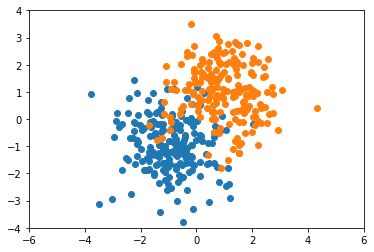

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def gen_data(center,n=200,random_state=1):
    rnd=np.random.RandomState(random_state)

    Xs=[rnd.randn(n,2) + c for c in center]
    ys=[np.full(n, i) for i in range(len(center))]
    
    X=np.vstack(Xs)
    y=np.hstack(ys)
    pert=np.random.permutation(X.shape[0])
    X=X[pert]
    y=y[pert]
    
    return X,y

X,y=gen_data([[-1,-1],[1,1]])

plt.figure()
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.xlim(-6,6)
plt.ylim(-4,4)
plt.show()



### Regression

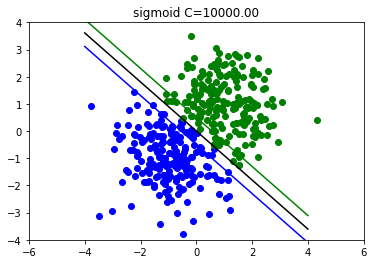

In [3]:
def plot(lr):
    
    X,y=gen_data([[-1,-1],[1,1]])
    lr.fit(X,y)
    yhat=lr.predict(X)

    plt.figure()
    plt.scatter(X[yhat==0,0], X[yhat==0,1],color="blue")
    plt.scatter(X[yhat==1,0], X[yhat==1,1],color="green")
    x_plt=np.linspace(-4,4,10)
    y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0])/(-lr.coef_[0,1])
    plt.plot(x_plt, y_plt, color="black")

    if lr.binary:
        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0] + 1)/(-lr.coef_[0,1])
        plt.plot(x_plt, y_plt,"blue")

        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0] - 1)/(-lr.coef_[0,1])
        plt.plot(x_plt, y_plt,"green")
    else:
        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*(lr.coef_[0,0]-lr.coef_[1,0])+(lr.intercept_[0]-lr.intercept_[1]) + 1)/(-lr.coef_[0,1]+lr.coef_[1,1])
        plt.plot(x_plt, y_plt,"blue")

        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*(lr.coef_[0,0]-lr.coef_[1,0])+(lr.intercept_[0]-lr.intercept_[1]) - 1)/(-lr.coef_[0,1]+lr.coef_[1,1])
        plt.plot(x_plt, y_plt,"green")
        
    
    if lr.binary:
        plt.title(("sigmoid C=%.2f"%lr.C))
    else:
        plt.title(("softmax C=%.2f"%lr.C))
        
    plt.xlim(-6,6)
    plt.ylim(-4,4)
    plt.show()

    #print(lr.coef_)
    #print(lr.intercept_)


plot(LogisticRegression(C=10000))

## Multi-class classification

### Three classes

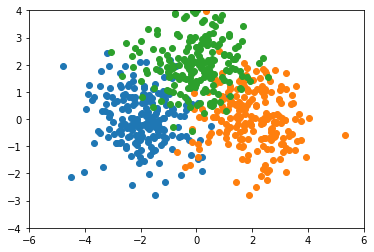

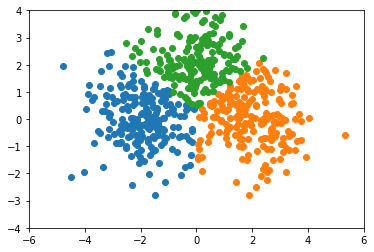

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_multi_class(X, y):
    plt.figure()
    nlabels=int(np.amax(y)+1)
    for i in range(nlabels):        
        plt.scatter(X[y==i,0], X[y==i,1])
        
    plt.xlim(-6,6)
    plt.ylim(-4,4)
    plt.show()
    

X,y=gen_data([[-2,0],[2,0],[0,2]])
plot_multi_class(X, y)


lr=LogisticRegression()
lr.fit(X,y)
yhat=lr.predict(X)
plot_multi_class(X, yhat)



### Switch problem

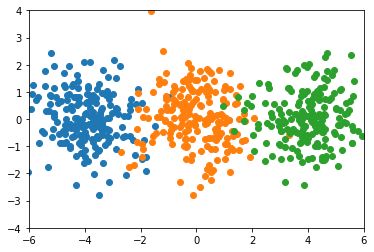

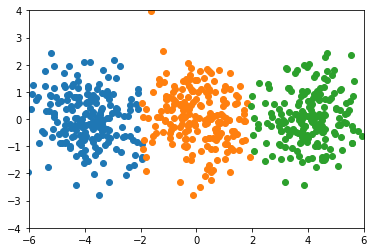

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X,y=gen_data([[-4,0],[0,0],[4,0]])

plot_multi_class(X, y)


lr=LogisticRegression()
lr.fit(X,y)
yhat=lr.predict(X)
plot_multi_class(X, yhat)



### Four classes problem

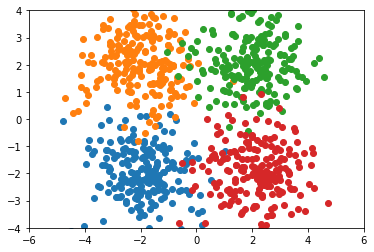

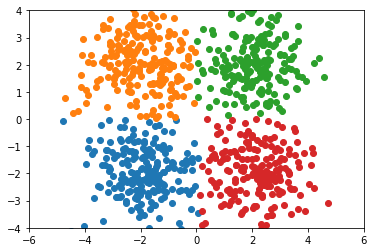

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X,y=gen_data([[-2,-2],[-2,2],[2,2],[2,-2]])
plot_multi_class(X, y)


lr=LogisticRegression()
lr.fit(X,y)
yhat=lr.predict(X)
plot_multi_class(X, yhat)


### Xor problem


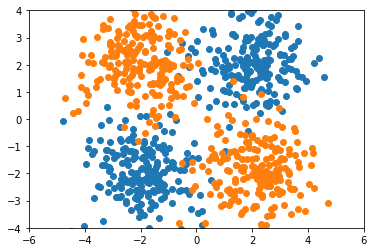

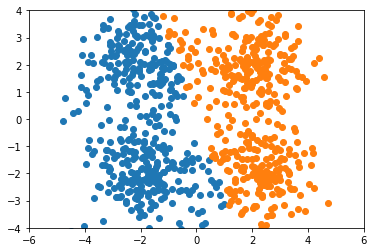

In [7]:
X,y=gen_data([[-2,-2],[-2,2],[2,2],[2,-2]])
y[y==2]=0
y[y==3]=1
plot_multi_class(X, y)


lr=LogisticRegression()
lr.fit(X,y)
yhat=lr.predict(X)
plot_multi_class(X, yhat)

## Discussion

### sigmoid and softmax comparison in 2 classes probelm
sigmoid is equal to assign two weights $w_1$, $w_2$ for two labels, (each weight is a vector) and set regularization term for sigmoid $\lambda_1 (w_1-w_2)^2$ where $\lambda_1=1/C_1$

Regularization term for softmax $\lambda_2 (w_1^2+w_2)^2 = 1/2 \lambda_2[(w_1-w_2)^2+(w_1+w_2)^2]$ where $\lambda_2=1/C_2$

$w_1+w_2$ has no effect on cross-entropy. We can sperate the loss as two indepent parts:
`cross-entropy` $ + 1/2 \lambda_2[(w_1-w_2)^2$ and $1/2 \lambda_2 (w_1+w_2)^2$. We have two conclusions:

1. After optimization $w_1 + w_2$ would be zero.
2. softmax will be equal to sigmoid, if $\lambda_1=1/2\lambda_2$ or $C_1=2C_2$


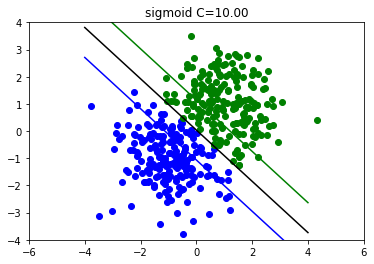

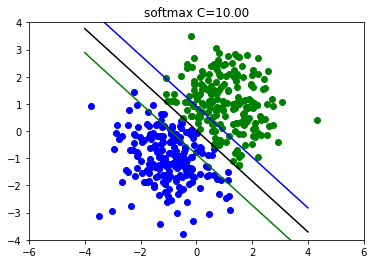

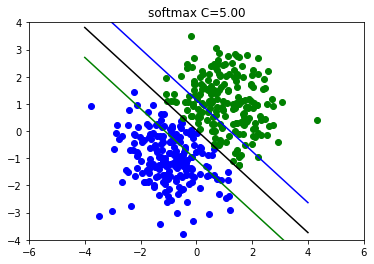

ceof
sigmoid C=10.00 [0.85626216 0.90778916]
softmax C=10.00 [1.05665485 1.13000136]
softmax C=05.00 [0.85626454 0.90779363]


In [8]:
X,y=gen_data([[-2,0],[+2,0]])

lr1=LogisticRegression(C=10)
plot(lr1)

lr2=LogisticRegression(multi_class='multinomial',C=10)
plot(lr2)

lr3=LogisticRegression(multi_class='multinomial',C=5)
plot(lr3)

print("ceof")
print("sigmoid C=%05.2f"%lr1.C, lr1.coef_.reshape(-1))
print("softmax C=%05.2f"%lr2.C, lr2.coef_[1] - lr2.coef_[0])
print("softmax C=%05.2f"%lr3.C, lr3.coef_[1] - lr3.coef_[0])

### Gradient decent results property

In [9]:
X,y=gen_data([[-2,-2],[-2,2],[2,2],[2,-2]])
lr=LogisticRegression()
lr.fit(X,y)

print("sum of coef is zero")
print(lr.coef_.sum(axis=0))
print("sum of intercept is zero")
print(lr.intercept_.sum())

sum of coef is zero
[-1.11022302e-16 -6.66133815e-16]
sum of intercept is zero
1.734723475976807e-17


# Benchmark and test

## Test 

### sigmoid

In [10]:
# no overflow problem
assert LogisticRegression.sigmoid([1E100]) == 1
assert LogisticRegression.sigmoid([-1E100]) == 0

In [11]:
# no overflow problem for large input
# we have some problem with -np.inf
print(LogisticRegression.sigmoid([-np.inf,-1E100,-1,0,1,1E100,np.inf],True))
print(LogisticRegression.sigmoid([-np.inf,-1E100,-1,0,1,1E100,np.inf],False))

[0.         0.         0.26894142 0.5        0.73105858 1.
 1.        ]
[       nan 0.         0.26894142 0.5        0.73105858 1.
 1.        ]


C:\Users\liangh\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in subtract


### softmax

In [12]:
# no overflow problem for large input
print(LogisticRegression.softmax([[1,1],[0,1],[1E-100,0],[1E+100,0],[-1E+100,0]]))
# we have some problem with -np.inf
print(LogisticRegression.softmax([[np.inf,0]]))

[[0.5        0.5       ]
 [0.26894142 0.73105858]
 [0.5        0.5       ]
 [1.         0.        ]
 [0.         1.        ]]
[[nan nan]]


C:\Users\liangh\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in subtract


## benchmark

### Tensor production

In [13]:
w=np.random.rand(1,100)
X=np.random.rand(1000,100)
#print(np.tensordot(X,w,axes=(1,1)))
#print(X.dot(w.reshape(-1)))
#print(np.einsum("ij,kj->ki",X,w))
#print(np.sum(X*w,axis=1))
%timeit X.dot(w.reshape(-1))
w_=w.reshape(-1)
%timeit X.dot(w_)
%timeit np.sum(X*w,axis=1)
%timeit np.einsum("ij,kj->i",X,w)
%timeit np.tensordot(X,w,axes=(1,1))


8.21 µs ± 488 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.51 µs ± 453 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
109 µs ± 618 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
46.9 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
23.4 µs ± 983 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### sigmoid and softmax for binary problem

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
NTRAIN=200
X1=np.random.randn(NTRAIN,2)
X2=np.random.randn(NTRAIN,2)
X1[:,0]-=2
X2[:,0]+=2
y1=np.full(NTRAIN, 0)
y2=np.full(NTRAIN, 1)

X=np.vstack((X1,X2))
y=np.append(y1, y2)
pert=np.random.permutation(X.shape[0])
X=X[pert]
y=y[pert]

print("sigmoid")
%timeit LogisticRegression().fit(X,y)
print("softmax")
%timeit LogisticRegression(multi_class='multinomial').fit(X,y)


sigmoid
13.8 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
softmax
35.6 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
